In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#!pip install arabic

In [2]:
data= pd.read_csv(r'C:\Users\bendh\OneDrive\Desktop\Arabic_poetry_dataset.csv', sep = ',')

In [3]:
data

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...
...,...,...,...,...,...
54939,55113,العصر المملوكي,ابن زمرك,اسقني بنت الدوالي,اسقني بنت الدوالي\nإنها نعم الدوالي\nسقّني سر ...
54940,55114,العصر المملوكي,ابن زمرك,الإلاه يحمد ويشكر,الإلاه يحمد ويشكر\nالمطر من اهن لشكر\nوالإلاه ...
54941,55115,العصر المملوكي,ابن زمرك,ألني أبلغ من العمل,ألنيّ أبلغ من العمل\nاللّه يبلّغك الأمل\nنزيه ...
54942,55116,العصر المملوكي,ابن زمرك,مهرجان هوذا اليوم للإنسان,مهرجان هوذا اليوم للإنسان\nألنزّيه والحسن والإ...


In [4]:
categories = data['category'].value_counts().index.tolist()
categories

['العصر العباسي',
 'العصر المملوكي',
 'العصر الايوبي',
 'العصر العثماني',
 'العصر الاموي',
 'العصر الأندلسي',
 'مصر',
 'لبنان',
 'عصر المخضرمون',
 'سوريا',
 'العصر الجاهلي',
 'فلسطين',
 'العراق',
 'اليمن',
 'المغرب',
 'البحرين',
 'تونس',
 'الإمارات',
 'موريتانيا',
 'العصر الإسلامي',
 'الأردن',
 'السعودية',
 'ليبيا',
 'الجزائر',
 'عمان',
 'السودان',
 'الكويت',
 'قطر']

In [5]:
# Define the mapping of categories you want to replace
category_mapping = {
    'مصر': 'العصر الحديث',
    'لبنان': 'العصر الحديث',
    'سوريا': 'العصر الحديث',
    'فلسطين': 'العصر الحديث',
    'العراق': 'العصر الحديث',
    'اليمن': 'العصر الحديث',
    'المغرب': 'العصر الحديث',
    'البحرين': 'العصر الحديث',
    'تونس':'العصر الحديث',
    'الإمارات':'العصر الحديث',
    'موريتانيا':'العصر الحديث',
    'الأردن':'العصر الحديث',
    'السعودية':'العصر الحديث',
    'ليبيا':'العصر الحديث',
    'الجزائر':'العصر الحديث',
    'عمان':'العصر الحديث',
    'السودان':'العصر الحديث',
    'الكويت':'العصر الحديث',
    'قطر':'العصر الحديث',
}

In [6]:
# Replace categories using the mapping
data['category'] = data['category'].replace(category_mapping)

In [7]:
categories1 = data['category'].value_counts().index.tolist()
categories1

['العصر الحديث',
 'العصر العباسي',
 'العصر المملوكي',
 'العصر الايوبي',
 'العصر العثماني',
 'العصر الاموي',
 'العصر الأندلسي',
 'عصر المخضرمون',
 'العصر الجاهلي',
 'العصر الإسلامي']

In [8]:
data.isna().sum()

id            0
category      0
poet_name     0
poem_title    0
poem_text     0
dtype: int64

In [9]:
data.isnull().sum()

id            0
category      0
poet_name     0
poem_title    0
poem_text     0
dtype: int64

In [65]:
# check for duplicates in the  dataset
print('The dataset contains', len(data[data.duplicated(keep=False)]), 'duplicate rows.\n')
data[data.duplicated(keep=False)]

The dataset contains 0 duplicate rows.



,id,category,poet_name,poem_title,poem_text,category_label


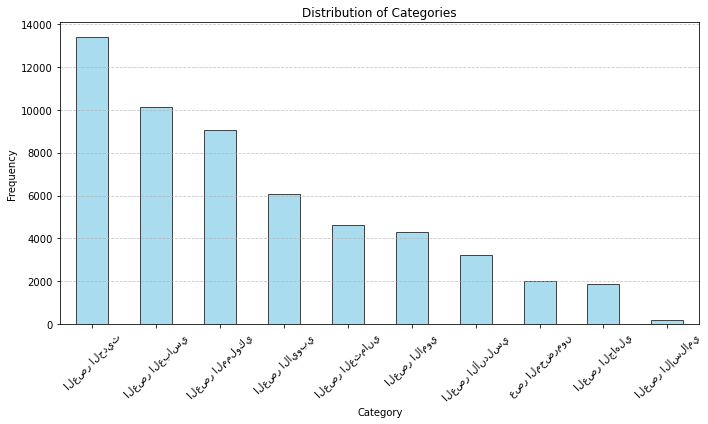

In [67]:
import matplotlib.pyplot as plt
# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
data['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

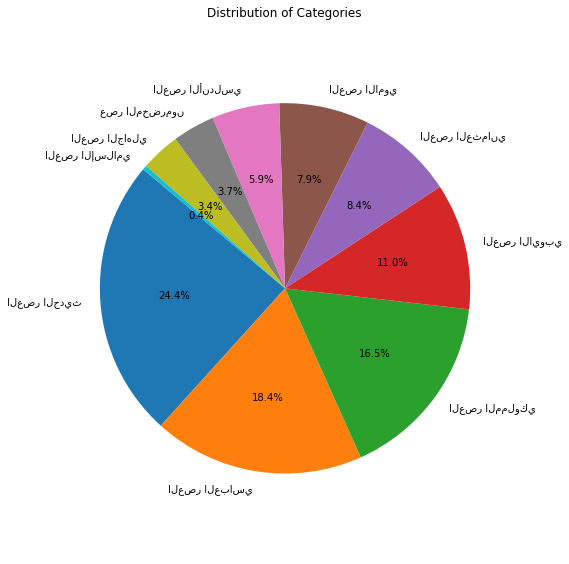

In [68]:
# Calculate category counts
category_counts = data['category'].value_counts()

# Plotting the distribution of categories using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [10]:
import re
# Function to remove diacritics
def remove_diacritics(text):
    pattern = re.compile("[\u064b-\u065f\u0670]")
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

In [11]:
data['poem_text']=data['poem_text'].apply(remove_diacritics)

In [12]:
data['poem_text']

0        بدت تختال في حلل الجمال\nوجادت بالزيارة والوصا...
1        يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2        بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3        هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4        روحي فداك وإن منحت صدودا\nأخفاك ما بي أم أطعت ...
                               ...                        
54939    اسقني بنت الدوالي\nإنها نعم الدوالي\nسقني سر ا...
54940    الإلاه يحمد ويشكر\nالمطر من اهن لشكر\nوالإلاه ...
54941    ألني أبلغ من العمل\nالله يبلغك الأمل\nنزيه تحت...
54942    مهرجان هوذا اليوم للإنسان\nألنزيه والحسن والإح...
54943    الأمير بدر المواكب\nزدل ناجم فالكواكب\nالسعود ...
Name: poem_text, Length: 54944, dtype: object

In [13]:
import unicodedata

def unicode_normalize(text):
    # Normalize the text using NFC (Normalization Form Canonical Composition)
    normalized_text = unicodedata.normalize('NFC', text)
    return normalized_text


In [14]:
data['poem_text']=data['poem_text'].apply(unicode_normalize)

In [15]:
data['poem_text']

0        بدت تختال في حلل الجمال\nوجادت بالزيارة والوصا...
1        يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2        بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3        هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4        روحي فداك وإن منحت صدودا\nأخفاك ما بي أم أطعت ...
                               ...                        
54939    اسقني بنت الدوالي\nإنها نعم الدوالي\nسقني سر ا...
54940    الإلاه يحمد ويشكر\nالمطر من اهن لشكر\nوالإلاه ...
54941    ألني أبلغ من العمل\nالله يبلغك الأمل\nنزيه تحت...
54942    مهرجان هوذا اليوم للإنسان\nألنزيه والحسن والإح...
54943    الأمير بدر المواكب\nزدل ناجم فالكواكب\nالسعود ...
Name: poem_text, Length: 54944, dtype: object

In [16]:
def remove_non_arabic_characters(text):
    return re.sub(r'[^؀-ۿ]', ' ', text)

In [17]:
data['poem_text']=data['poem_text'].apply(remove_non_arabic_characters)

In [18]:
data['poem_text']

0        بدت تختال في حلل الجمال وجادت بالزيارة والوصال...
1        يا طائر الشعر القرير يا وحي إلهام الصدور أسعف ...
2        بنت حجرات أرى من عجب أن أرى فيك جمال العرب دون...
3        هذا الربيع بنور الحسن وافانا وقد كسا الأرض بال...
4        روحي فداك وإن منحت صدودا أخفاك ما بي أم أطعت ح...
                               ...                        
54939    اسقني بنت الدوالي إنها نعم الدوالي سقني سر الف...
54940    الإلاه يحمد ويشكر المطر من اهن لشكر والإلاه ين...
54941    ألني أبلغ من العمل الله يبلغك الأمل نزيه تحتج ...
54942    مهرجان هوذا اليوم للإنسان ألنزيه والحسن والإحس...
54943    الأمير بدر المواكب زدل ناجم فالكواكب السعود كل...
Name: poem_text, Length: 54944, dtype: object

In [19]:
def handle_numbers_and_symbols(text):
    return re.sub(r'[0-9]+', '', text)

In [20]:
data['poem_text']=data['poem_text'].apply(handle_numbers_and_symbols)

In [21]:
data['poem_text']

0        بدت تختال في حلل الجمال وجادت بالزيارة والوصال...
1        يا طائر الشعر القرير يا وحي إلهام الصدور أسعف ...
2        بنت حجرات أرى من عجب أن أرى فيك جمال العرب دون...
3        هذا الربيع بنور الحسن وافانا وقد كسا الأرض بال...
4        روحي فداك وإن منحت صدودا أخفاك ما بي أم أطعت ح...
                               ...                        
54939    اسقني بنت الدوالي إنها نعم الدوالي سقني سر الف...
54940    الإلاه يحمد ويشكر المطر من اهن لشكر والإلاه ين...
54941    ألني أبلغ من العمل الله يبلغك الأمل نزيه تحتج ...
54942    مهرجان هوذا اليوم للإنسان ألنزيه والحسن والإحس...
54943    الأمير بدر المواكب زدل ناجم فالكواكب السعود كل...
Name: poem_text, Length: 54944, dtype: object

In [22]:
def clean_text(text):
    return re.sub(r'\s+', ' ', text)

In [23]:
data['poem_text']=data['poem_text'].apply(clean_text)

In [24]:
data['poem_text']

0        بدت تختال في حلل الجمال وجادت بالزيارة والوصال...
1        يا طائر الشعر القرير يا وحي إلهام الصدور أسعف ...
2        بنت حجرات أرى من عجب أن أرى فيك جمال العرب دون...
3        هذا الربيع بنور الحسن وافانا وقد كسا الأرض بال...
4        روحي فداك وإن منحت صدودا أخفاك ما بي أم أطعت ح...
                               ...                        
54939    اسقني بنت الدوالي إنها نعم الدوالي سقني سر الف...
54940    الإلاه يحمد ويشكر المطر من اهن لشكر والإلاه ين...
54941    ألني أبلغ من العمل الله يبلغك الأمل نزيه تحتج ...
54942    مهرجان هوذا اليوم للإنسان ألنزيه والحسن والإحس...
54943    الأمير بدر المواكب زدل ناجم فالكواكب السعود كل...
Name: poem_text, Length: 54944, dtype: object

In [25]:
# Preprocessing - Convert text labels to numerical labels
category_to_label = {category: idx for idx, category in enumerate(data['category'].unique())}
data['category_label'] = data['category'].map(category_to_label)
X = data['poem_text']
y = data['category_label']

In [26]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [42]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [43]:
#predict poem category using Naive Bayes
def predict_poem_category(poem_text):   
    poem_text = remove_diacritics(poem_text)
    poem_text1 = remove_non_arabic_characters(poem_text)
    poem_text2 = handle_numbers_and_symbols(poem_text1)
    poem_text3 = unicode_normalize(poem_text2)
    poem_text4 = clean_text(poem_text3)
    
    # Vectorizing input text
    poem_tfidf = tfidf_vectorizer.transform([poem_text4])
    
    # Predicting category class for the input text
    predicted_class = nb_classifier.predict(poem_tfidf)[0]
    
    # Mapping numerical label back to the original category
    label_to_category = {v: k for k, v in category_to_label.items()}  # Assuming you have this mapping from previous steps
    predicted_category = label_to_category[predicted_class]
    
    return predicted_category

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust parameters as needed
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Function to predict poem category using Random Forest
def RFpredict_poem_category(poem_text):
    poem_text = remove_diacritics(poem_text)
    poem_text1 = remove_non_arabic_characters(poem_text)
    poem_text2 = handle_numbers_and_symbols(poem_text1)
    poem_text3 = unicode_normalize(poem_text2)
    poem_text4 = clean_text(poem_text3)
    
    # Vectorize the input text
    poem_tfidf = tfidf_vectorizer.transform([poem_text4])
    
    # Predict the category class for the input text using Random Forest Classifier
    predicted_class = rf_classifier.predict(poem_tfidf)[0]
    
    # Map the numerical label back to the original category
    label_to_category = {v: k for k, v in category_to_label.items()}  # Assuming you have this mapping from previous steps
    predicted_category = label_to_category[predicted_class]
    
    return predicted_category

In [54]:
# Testing the models
poem_text = "وهوى طريق الحق فيه مظلم وقضية صمت القضاة ترفعًا عن فصلها والخصم فيها يحكم"

In [55]:
# Naive Bayes prediction
predicted_category_nb = predict_poem_category(poem_text)
print("Naive Bayes Predicted Category:", predicted_category_nb)

Naive Bayes Predicted Category: العصر الحديث


In [56]:
# Random Forest prediction
predicted_category_rf = RFpredict_poem_category(poem_text)
print("Random Forest Predicted Category:", predicted_category_rf)

Random Forest Predicted Category: العصر المملوكي


In [57]:
#Naive Bayes classifier on test data
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classifier Accuracy:", accuracy_nb)

Naive Bayes Classifier Accuracy: 0.2560742560742561


In [58]:
# Predict using Random Forest classifier on test data
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.37983437983437984


In [59]:
import sys
import time

In [60]:
#time taken to train Naive Bayes
start_time = time.time()
nb_classifier.fit(X_train, y_train)
nb_training_time = time.time() - start_time
print("Training time for Naive Bayes:", nb_training_time)

Training time for Naive Bayes: 0.4845852851867676


In [61]:
#time taken to train Random Forest
start_time = time.time()
rf_classifier.fit(X_train, y_train)
rf_training_time = time.time() - start_time
print("Training time for Random Forest:", rf_training_time)

Training time for Random Forest: 3359.0786068439484


In [62]:
# space complexity : memory usage after training Naive Bayes
nb_memory_usage = sys.getsizeof(nb_classifier)
print("Memory usage for Naive Bayes:", nb_memory_usage)

Memory usage for Naive Bayes: 48


In [63]:
#space complexity : memory usage after training Random Forest
rf_memory_usage = sys.getsizeof(rf_classifier)
print("Memory usage for Random Forest:", rf_memory_usage)

Memory usage for Random Forest: 48
